# Lab 3 assignment
## SVM and Decision Tree for Phishing Websites Detection
---
## Data:
- **lab3phishing.csv** contains information of phishing websites. There are 31 columns in the dataset, containing 30 features and 1 target. Column names of the dataset is given in the code cell below.
- The target variable is “target”: its value is either `-1` or `1`. 
- All other columns are features. All the features having a binary value are generally denoting the absence or presence of respective attribute. Attributes with three possible values are generally representing the strength(low, medium, high).


In [ ]:
# Column names for the dataset
col_names = ["has_ip", "long_url", "short_service", "has_at", "double_slash_redirect",
           "pref_suf", "has_sub_domain", "ssl_state", "long_domain", "favicon", "port",
           "https_token", "req_url", "url_of_anchor", "tag_links", "SFH", 
           "submit_to_email", "abnormal_url", "redirect", "mouseover", "right_click",
           "popup", "iframe", "domain_Age", "dns_record", "traffic", "page_rank",
           "google_index", "links_to_page", "stats_report", "target"]
len(col_names)

31

## Tasks:
The objective is to identify whether a website is a Phishing website or not. Use 75% of the dataset for training and the remaining 25% for testing.
- Task 1 (10 points): Build a decision tree classifier. Tune the parameters to get your best model in terms of prediction accuracy.
- Task 2 (10 points): Build a SVM classifier. Tune the parameters to get your best model in terms of prediction accuracy.

## Deadline:
Submit your .ipynb by 23:59 pm (ET), Tuesday, Feb 16, 2021.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
dat = pd.read_csv('lab3phishing.csv')
dat.columns = col_names
dat

,has_ip,long_url,short_service,has_at,double_slash_redirect,pref_suf,has_sub_domain,ssl_state,long_domain,favicon,...,popup,iframe,domain_Age,dns_record,traffic,page_rank,google_index,links_to_page,stats_report,target
0,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
1,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
2,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
3,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,-1
4,1,0,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,0,-1,0,0,0,0,0,-1,1,0,...,0,0,-1,0,1,0,0,0,0,1
2451,0,-1,0,1,0,0,0,0,1,0,...,0,0,0,1,-1,0,0,1,0,1
2452,0,-1,0,0,0,0,0,1,0,0,...,0,0,-1,0,1,0,0,0,0,-1
2453,0,-1,0,0,0,0,-1,-1,1,0,...,0,0,1,0,-1,-1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dat.drop('target', axis=1), dat['target'] ,test_size=0.25, random_state=10)

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtc.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.964


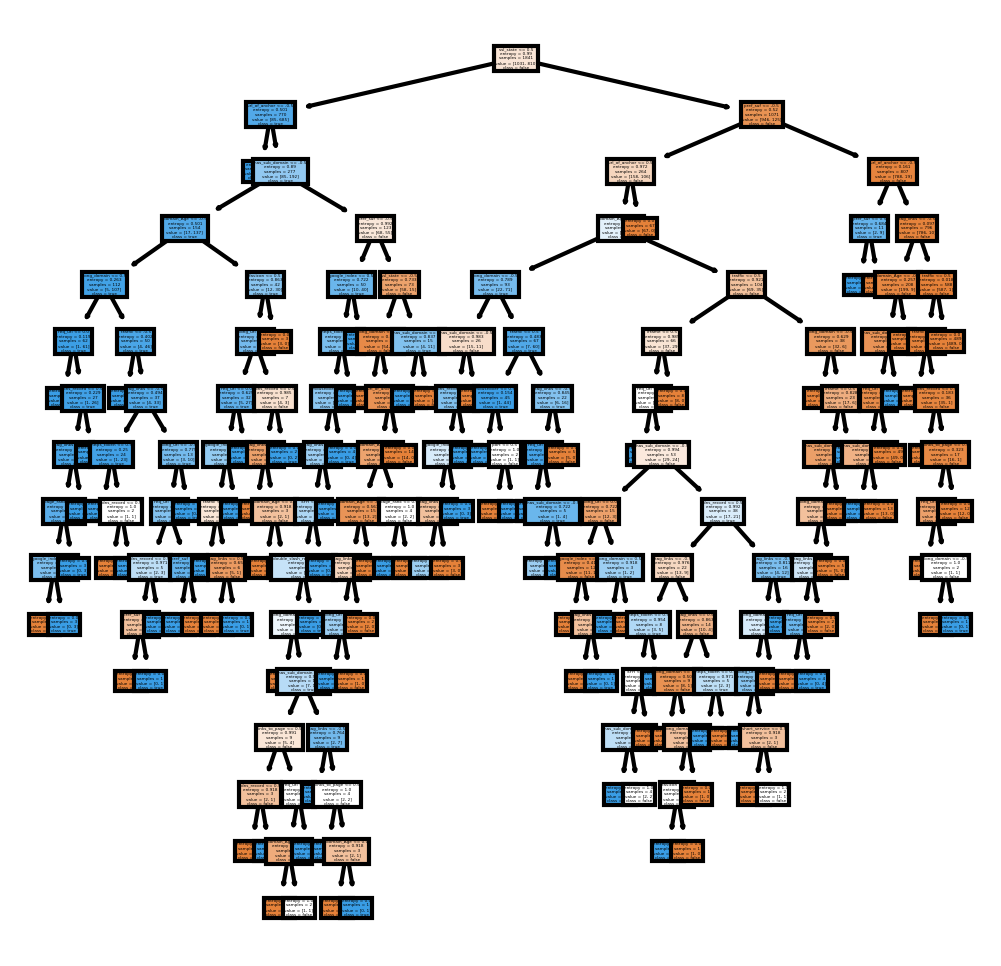

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc,
               feature_names = dat.columns.values, 
               class_names= ["false", "true"],
               filled = True);

In [ ]:
dtc2 = DecisionTreeClassifier(criterion='entropy',max_depth=3, max_leaf_nodes=5)
dtc2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtc.score(X_test, y_test)))

Accuracy on training set: 0.894
Accuracy on test set: 0.907


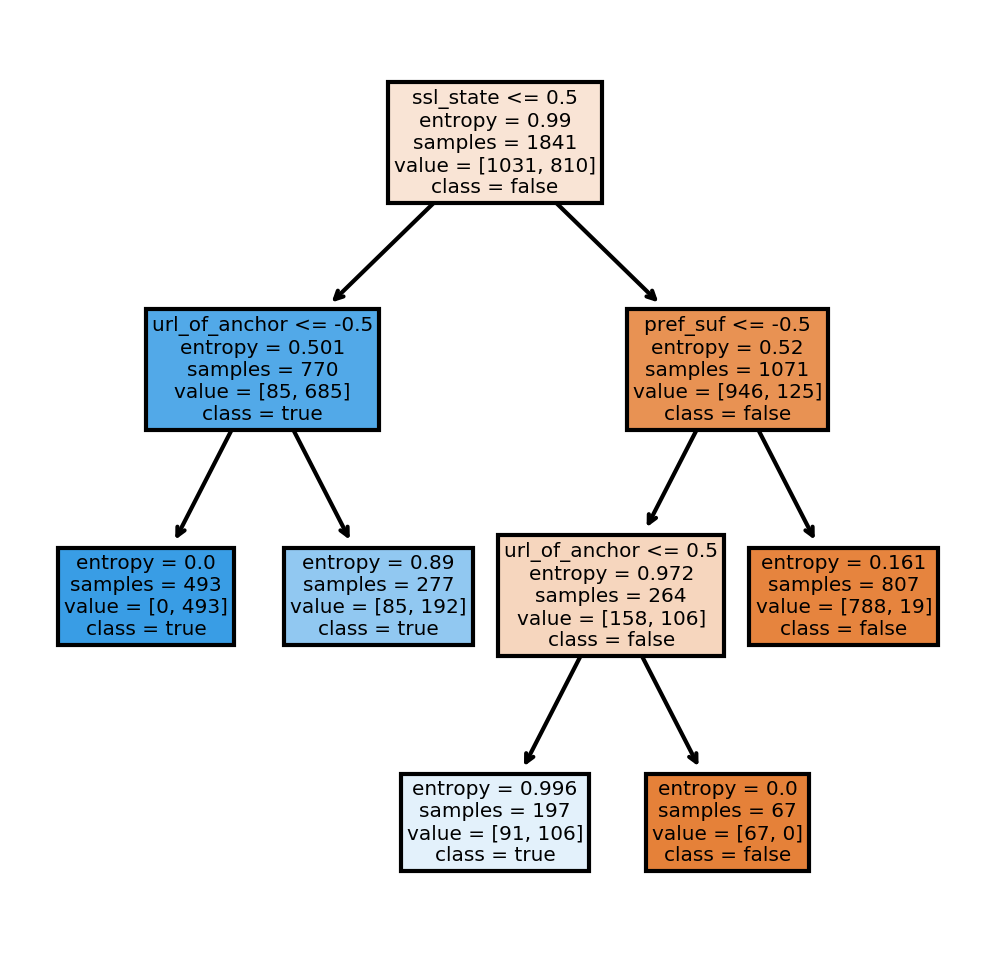

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc2,
               feature_names = dat.columns.values, 
               class_names= ["false", "true"],
               filled = True);

In [ ]:
importance = dtc.feature_importances_
print("Feature importances:")
for i,v in enumerate(importance):
    if v > 0.1:
        print('Feature: %s, Score: %.5f' % (dat.columns.values[i],v))

Feature importances:
Feature: pref_suf, Score: 0.13634
Feature: ssl_state, Score: 0.70372
Feature: url_of_anchor, Score: 0.15994


In [ ]:
f1 = 'ssl_state'
f2 = 'url_of_anchor'

X = dat[[f1, f2]]
Y = dat['target']

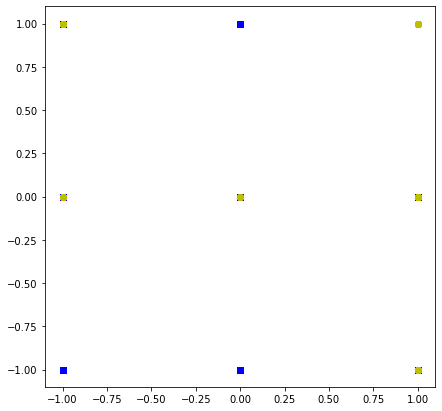

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(X[f1][Y==1], X[f2][Y==1], 'bs')
plt.plot(X[f1][Y==-1], X[f2][Y==-1], 'yo')
plt.show()

In [ ]:
x, x_test, y, y_test = train_test_split(X, Y,test_size=0.25, random_state=17)

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0] # weights assigned to the features
    b = svm_clf.intercept_[0] # constants in decision function.

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[f1], svs[f2], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)

In [ ]:
scaler = StandardScaler()
svm_clf = LinearSVC(C=100, loss="hinge", random_state=42, max_iter = 50000)

scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])

scaled_svm_clf.fit(x, y);
print("Accuracy on training set: {:.3f}".format(scaled_svm_clf.score(x, y)))
print("Accuracy on test set: {:.3f}".format(scaled_svm_clf.score(x_test, y_test)))

b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
w = svm_clf.coef_[0] / scaler.scale_
svm_clf.intercept_ = np.array([b])
svm_clf.coef_ = np.array([w])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx = (t * (x.dot(w) + b) < 1).ravel()
svm_clf.support_vectors_ = x[support_vectors_idx]


Accuracy on training set: 0.895
Accuracy on test set: 0.893


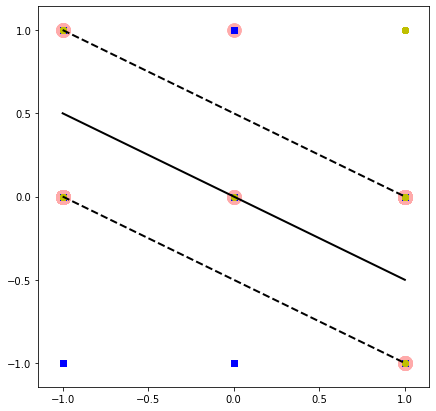

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(x[f1][y==1], x[f2][y==1], 'bs')
plt.plot(x[f1][y==-1], x[f2][y==-1], 'yo')
plot_svc_decision_boundary(svm_clf, -1, 1)
plt.show()

In [ ]:
svm_clf_rbf = SVC(kernel='rbf')
svm_clf_rbf.fit(x, y);
print("Accuracy on training set: {:.3f}".format(svm_clf_rbf.score(x, y)))
print("Accuracy on test set: {:.3f}".format(svm_clf_rbf.score(x_test, y_test)))

Accuracy on training set: 0.903
Accuracy on test set: 0.904


C:\Users\archk\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[f1][y==-1], X[f2][y==-1], "bs")
    plt.plot(X[f1][y==1], X[f2][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

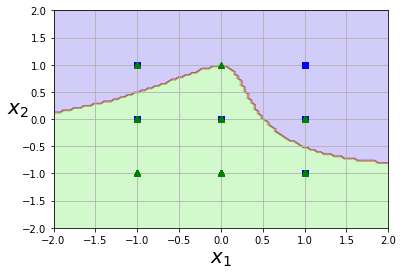

In [ ]:
# visualize the trained SVM model's decision boundary
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    y_decision = clf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(svm_clf_rbf, [-2, 2, -2, 2])
plot_dataset(x, y, [-2, 2, -2, 2])

plt.show()

In [ ]:
f1 = 'ssl_state'
f2 = 'pref_suf'

X = dat[[f1, f2]]
Y = dat['target']

In [ ]:
x, x_test, y, y_test = train_test_split(X, Y,test_size=0.25, random_state=17)

In [ ]:
scaler = StandardScaler()
svm_clf = LinearSVC(C=100, loss="hinge", random_state=42, max_iter = 50000)

scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])

scaled_svm_clf.fit(x, y);
print("Accuracy on training set: {:.3f}".format(scaled_svm_clf.score(x, y)))
print("Accuracy on test set: {:.3f}".format(scaled_svm_clf.score(x_test, y_test)))

b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
w = svm_clf.coef_[0] / scaler.scale_
svm_clf.intercept_ = np.array([b])
svm_clf.coef_ = np.array([w])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx = (t * (x.dot(w) + b) < 1).ravel()
svm_clf.support_vectors_ = x[support_vectors_idx]


Accuracy on training set: 0.829
Accuracy on test set: 0.829


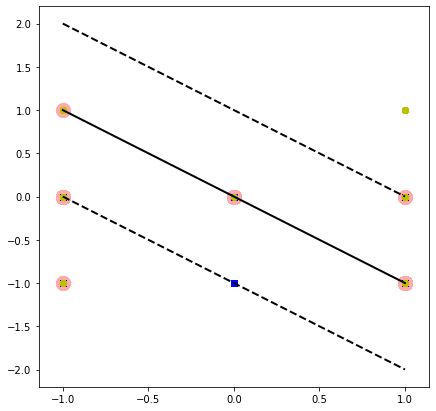

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(x[f1][y==1], x[f2][y==1], 'bs')
plt.plot(x[f1][y==-1], x[f2][y==-1], 'yo')
plot_svc_decision_boundary(svm_clf, -1, 1)
plt.show()

In [ ]:
svm_clf_rbf = SVC(kernel='rbf')
svm_clf_rbf.fit(x, y);
print("Accuracy on training set: {:.3f}".format(svm_clf_rbf.score(x, y)))
print("Accuracy on test set: {:.3f}".format(svm_clf_rbf.score(x_test, y_test)))

Accuracy on training set: 0.895
Accuracy on test set: 0.897


C:\Users\archk\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


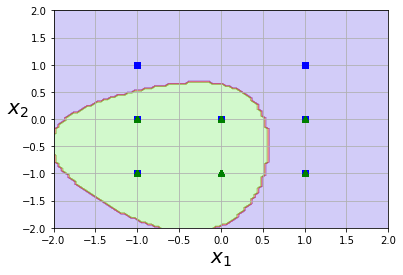

In [ ]:
plot_predictions(svm_clf_rbf, [-2, 2, -2, 2])
plot_dataset(x, y, [-2, 2, -2, 2])

plt.show()

In [ ]:
X = dat.drop('target', axis=1)
Y = dat['target']

In [ ]:
x, x_test, y, y_test = train_test_split(X, Y,test_size=0.25, random_state=17)

In [ ]:
scaler = StandardScaler()
svm_clf = LinearSVC(C=100, loss="hinge", random_state=42, max_iter = 10**9)

scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])

scaled_svm_clf.fit(x, y);
print("Accuracy on training set: {:.3f}".format(scaled_svm_clf.score(x, y)))
print("Accuracy on test set: {:.3f}".format(scaled_svm_clf.score(x_test, y_test)))

Accuracy on training set: 0.951
Accuracy on test set: 0.943


In [ ]:
svm_clf_rbf = SVC(kernel='rbf')
svm_clf_rbf.fit(x, y);
print("Accuracy on training set: {:.3f}".format(svm_clf_rbf.score(x, y)))
print("Accuracy on test set: {:.3f}".format(svm_clf_rbf.score(x_test, y_test)))

Accuracy on training set: 0.954
Accuracy on test set: 0.950


C:\Users\archk\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
